Import dependencies

In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read titanic.csv file

In [16]:
titanic = pd.read_csv('titanic.csv')
# number of passengers
print(len(titanic.index))
titanic.head()

1309


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We can try a regression by comparing age/fare

In [27]:
# features all except price
features = titanic.drop('Fare', axis=1).values
targets =  titanic['Fare'].values

# take the fifth column only from the features
feature_age = features[:,5]
# If we print the list of ages, we see that we have some missing data (NaN)
print("Inspect the age values to check for existing NaN:")
print(feature_age)


from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# Before applying the fit function to our list of ages we need to crete a 2D array
feature_age = feature_age.reshape(-1, 1)
# We can then fit and transform the data to convert NaN using the mean value
imp.fit(feature_age)
feature_age = imp.transform(feature_age)

# After trying to apply a regression, an "NaN" error occurs linked to the target
# So we can also use the mean value for the target
targets = targets.reshape(-1, 1)
imp.fit(targets)
targets = imp.transform(targets)
print("Check Fare values have the correct shape:")
print(targets)

Inspect the age values to check for existing NaN:
[22.0 38.0 26.0 ... 38.5 nan nan]
Check Fare values have the correct shape:
[[ 7.25  ]
 [71.2833]
 [ 7.925 ]
 ...
 [ 7.25  ]
 [ 8.05  ]
 [22.3583]]


We can now start plotting

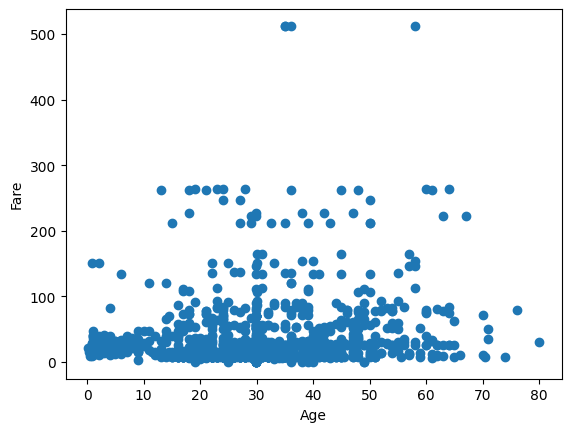

In [28]:
plt.scatter(feature_age, targets)
plt.ylabel('Fare')
plt.xlabel('Age')
plt.show()

From the plotting we can see that we don't have a clear correlation between the ages and the fares.

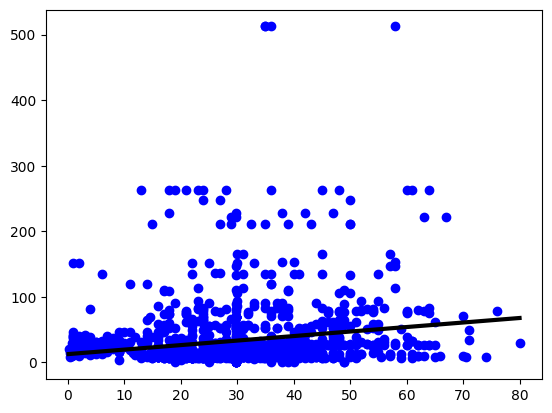

In [29]:
model = LinearRegression()
model.fit(feature_age, targets)
prediction_space = np.linspace(min(feature_age), max(feature_age)).reshape(-1,1)
plt.scatter(feature_age, targets, color='blue')
plt.plot(prediction_space, model.predict(prediction_space),
         color='black', linewidth=3)
plt.show()

So the linear regression applied to age/fare is not really working in this case